<a href="https://colab.research.google.com/github/Taneyquezada/Estadistica/blob/main/ei_u2_01_22150442.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

H0: El tiempo de duración de un ejercicio y el maxpulse que tenga la persona, determinan la cantidad de calorías que se quemarán 



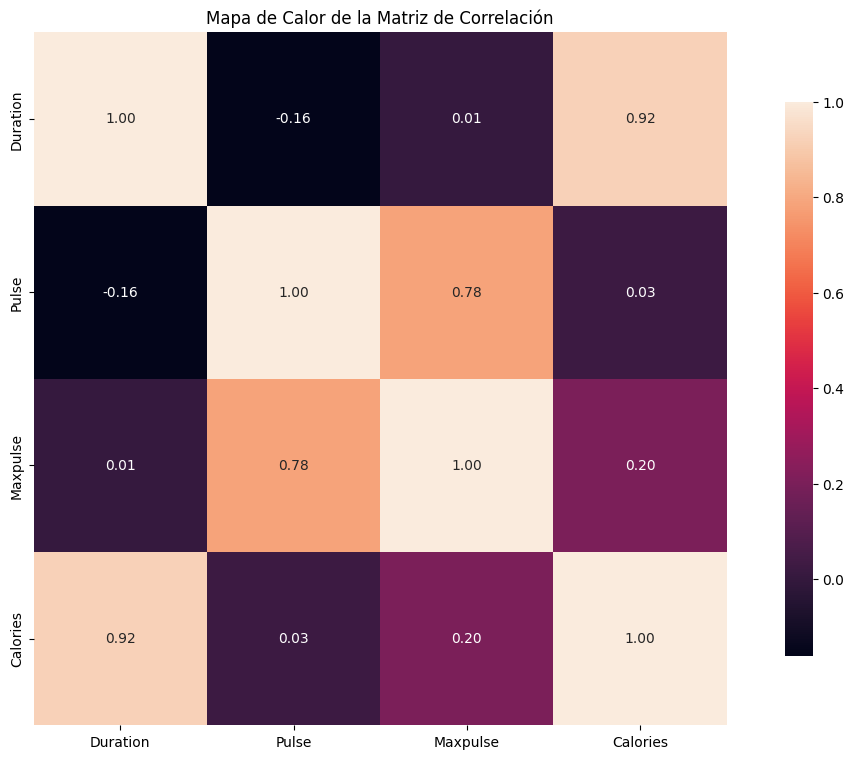


Ecuación del modelo:
Calories = -419.69 + (5.72 * Duration) + (3.19 * Maxpulse)

Matriz de correlación:
           Duration  Maxpulse  Calories
Duration  1.000000  0.005679  0.922717
Maxpulse  0.005679  1.000000  0.203813
Calories  0.922717  0.203813  1.000000




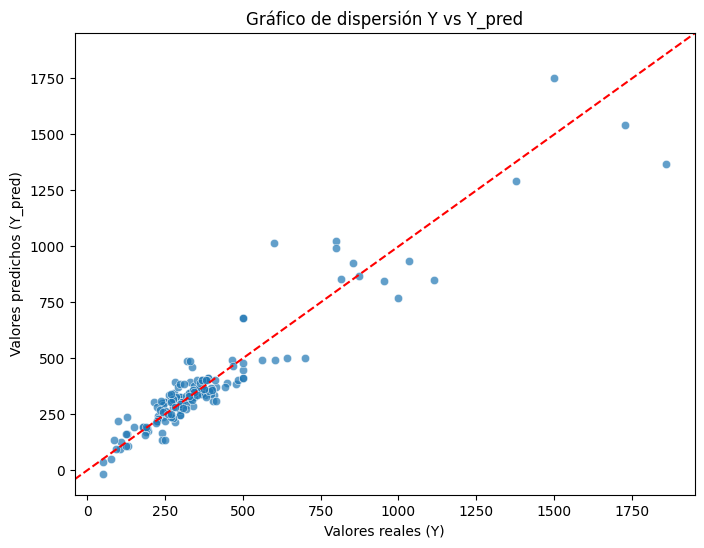


Resultados del test de Breusch-Pagan:

Estadístico LM: 60.4410
p-valor: 0.0000
Estadístico F: 46.9828
p-valor F: 0.0000
Nuesto resultado al ser menor a significa que si tenemos una heteroscedasticidad 
en el modelo. Los residuos no tienen una varianza constante por lo que la validez de la regresión lineal estandar se ve afectada,


En conclusión se puede ver que en el coeficiente de correlación existe una relación 
entre las variables duration, maxpulse yb calories. 
El test de Breusch-Pagan reveló un p-valor de 0.0000, lo que indica la presencia de heterocedasticidad en los residuos del modelo. 
Esto significa que la varianza de los errores no es constante, lo que puede afectar la fiabilidad de la regresión lineal estándar.


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

df = pd.read_csv("https://raw.githubusercontent.com/Taneyquezada/Estadistica/refs/heads/main/data.csv")
df.dropna(inplace = True)

# b) Obtén un mapa de calor con la matriz de correlación. Determina las variables independientes y la variable dependiente y redacta una hipótesis.
X = df[["Duration", "Maxpulse"]]
Y = df["Calories"]
print("H0: El tiempo de duración de un ejercicio y el maxpulse que tenga la persona, determinan la cantidad de calorías que se quemarán \n")
corr_matrix = df.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", square = True, cbar_kws ={"shrink":.8})
plt.title("Mapa de Calor de la Matriz de Correlación")
plt.show()

#Variable independiente X
X = df[["Duration", "Maxpulse"]]
#Variable dependiente Y
Y = df["Calories"]


# c) Obtén el modelo que permite relacionar las variables independientes y la variable dependiente
model = LinearRegression()
model.fit(X, Y)

# Obtener coeficientes e intercepto
print("\nEcuación del modelo:")
print(f"Calories = {model.intercept_:.2f} + ({model.coef_[0]:.2f} * Duration) + ({model.coef_[1]:.2f} * Maxpulse)")

# d) Obtén el coeficiente de correlación e interpreta el resultado.
# Calcular la matriz de correlación
correlation_matrix = df[["Duration", "Maxpulse", "Calories"]].corr()

# Mostrar coeficientes de correlación
print("\nMatriz de correlación:\n", correlation_matrix)
print("\n")

#e) Verifica los supuestos mediante un gráfico "y" vs "y_pred" el test de Breusch-Pagan. Interpreta los resultados.
# Obtener predicciones
Y_pred = model.predict(X)

# --- 1. Gráfico Y vs Y_pred ---
plt.figure(figsize=(8,6))
sns.scatterplot(x=Y, y=Y_pred, alpha=0.7)
plt.xlabel("Valores reales (Y)")
plt.ylabel("Valores predichos (Y_pred)")
plt.title("Gráfico de dispersión Y vs Y_pred")
plt.axline([Y.min(), Y.min()], [Y.max(), Y.max()], color="red", linestyle="--")  # Línea de referencia
plt.show()

# --- 2. Test de Breusch-Pagan ---
X_const = sm.add_constant(X)  # Agregar constante al modelo
residuals = Y - Y_pred  # Obtener residuos

bp_test = het_breuschpagan(residuals, X_const)
labels = ['\nEstadístico LM', 'p-valor', 'Estadístico F', 'p-valor F']
results = dict(zip(labels, bp_test))

print("\nResultados del test de Breusch-Pagan:")
for key, value in results.items():
    print(f"{key}: {value:.4f}")

print("Nuesto resultado al ser menor a significa que si tenemos una heteroscedasticidad \nen el modelo. Los residuos no tienen una varianza constante por lo que la validez de la regresión lineal estandar se ve afectada,")
print("\n")
print("En conclusión se puede ver que en el coeficiente de correlación existe una relación \nentre las variables duration, maxpulse yb calories. \nEl test de Breusch-Pagan reveló un p-valor de 0.0000, lo que indica la presencia de heterocedasticidad en los residuos del modelo. \nEsto significa que la varianza de los errores no es constante, lo que puede afectar la fiabilidad de la regresión lineal estándar.")